In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import seaborn as sns
df=sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
df.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [ ]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
#number of passenger in each class
df.groupby('pclass')['pclass'].count()

,pclass
pclass,
1,180
2,171
3,352


In [ ]:
df.groupby('sex')['sex'].count()

,sex
sex,
female,261
male,442


In [ ]:
#Number of passenger who survived in each class  grouped by sex.Also total was found for each class grouped by sex
df.pivot_table('survived','sex','pclass',aggfunc=np.sum,margins=True)

<ipython-input-43-94d5bd1bad6b>:2: FutureWarning: The provided callable <function sum at 0x7b8da41602c0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df.pivot_table('survived','sex','pclass',aggfunc=np.sum,margins=True)
<ipython-input-43-94d5bd1bad6b>:2: FutureWarning: The provided callable <function sum at 0x7b8da41602c0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df.pivot_table('survived','sex','pclass',aggfunc=np.sum,margins=True)
<ipython-input-43-94d5bd1bad6b>:2: FutureWarning: The provided callable <function sum at 0x7b8da41602c0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df.pivot_table('surv

pclass,1,2,3,All
sex,,,,
female,82,68,47,197
male,39,15,38,92
All,121,83,85,289


In [ ]:
#check missing value
import seaborn as sns
df=sns.load_dataset('titanic')
df.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


In [ ]:
#Handling Missing value
import seaborn as sns
df=sns.load_dataset('titanic')
df['age'].median()


28.0

In [ ]:
#check duplicates
print("Duplicates:",df.duplicated().sum())

Duplicates: 107


In [ ]:
#Remove duplicates
df.drop_duplicates(inplace=True)
print("Duplicates:",df.duplicated().sum())

Duplicates: 0


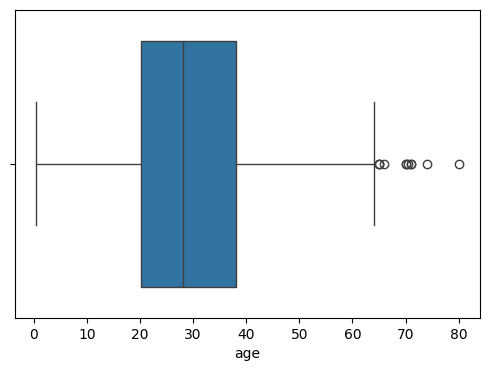

In [ ]:
#boxplot to check outliers
plt.figure(figsize=(6,4))
sns.boxplot(x=df['age'])
plt.show()


In [ ]:
#remove outliers
Q1=df['age'].quantile(0.25)
Q3=df['age'].quantile(0.75)
IQR=Q3-Q1
#Define limit
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR
#Removr outliers
df=df[(df['age']>=lower_limit)&(df['age']<=upper_limit)]
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,NaN,Queenstown,no,False
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


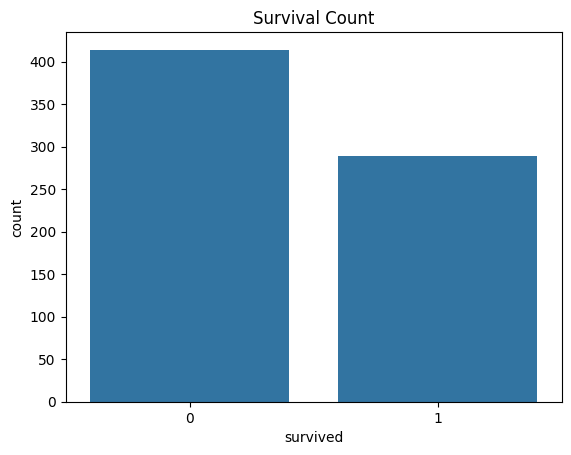

In [ ]:
#countplot of survivors
sns.countplot(x='survived',data=df)
plt.title("Survival Count")
plt.show()

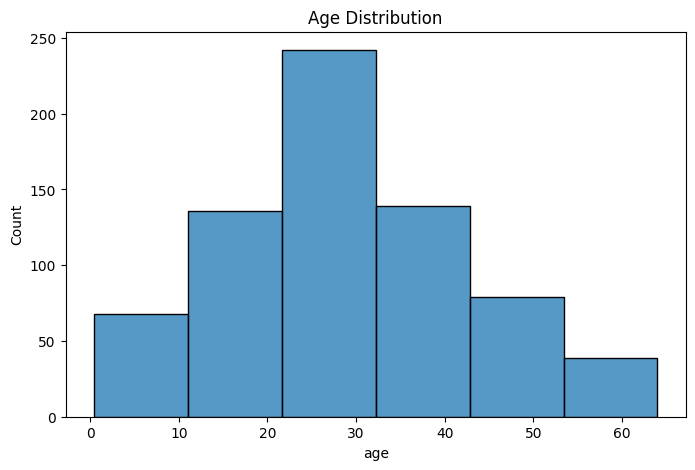

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(df['age'],bins=6)
plt.title('Age Distribution')
plt.show()

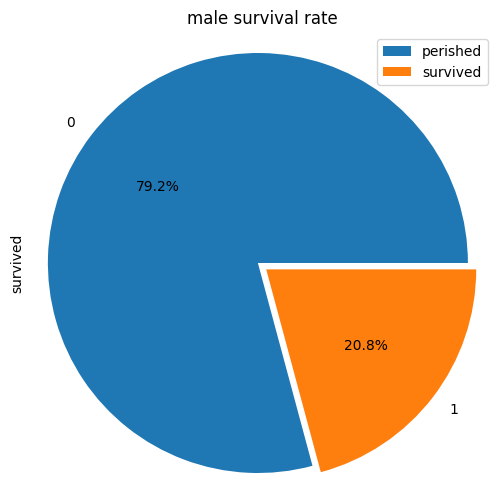

In [ ]:
df[df['sex']=='male'].survived.groupby(df.survived).count().plot(kind='pie',figsize=(6,6),explode=[0,0.05],autopct='%1.1f%%')
plt.axis('equal')
plt.legend(["perished","survived"])
plt.title("male survival rate")
plt.show()

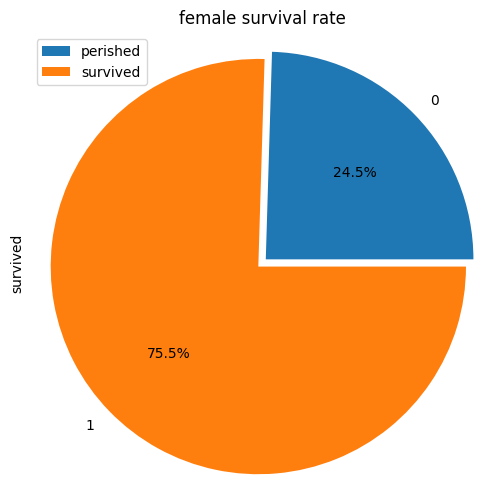

In [ ]:
df[df['sex']=='female'].survived.groupby(df.survived).count().plot(kind='pie',figsize=(6,6),explode=[0,0.05],autopct='%1.1f%%')
plt.axis('equal')
plt.legend(["perished","survived"])
plt.title("female survival rate")
plt.show()

In [ ]:
df['Family_size']=df['sibsp']+df['parch']+1
df['is_child']=np.where(df['age']<16,1,0)

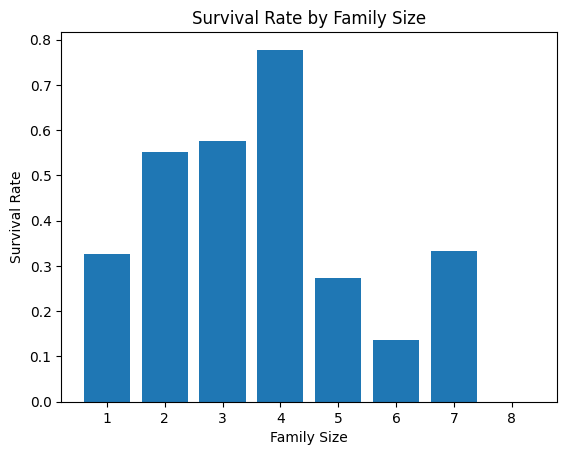

In [ ]:
mean_survival = df.groupby(df['Family_size'])['survived'].mean()
#Plot using Matplotlib
plt.bar(mean_survival.index, mean_survival.values)
plt.xlabel("Family Size")
plt.ylabel("Survival Rate")
plt.title("Survival Rate by Family Size")
plt.show()

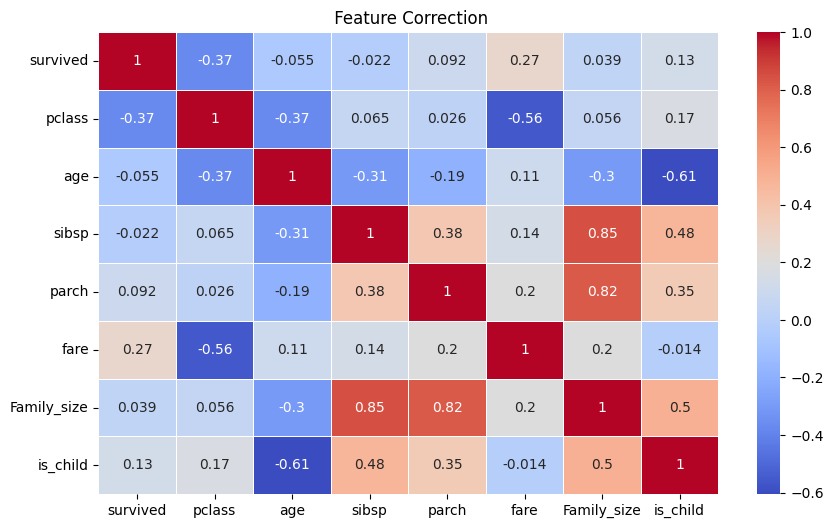

In [ ]:
numeric_df=df.select_dtypes(include=['number'])
plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(),annot=True,cmap='coolwarm',linewidths=0.5)
plt.title(" Feature Correction")
plt.show()

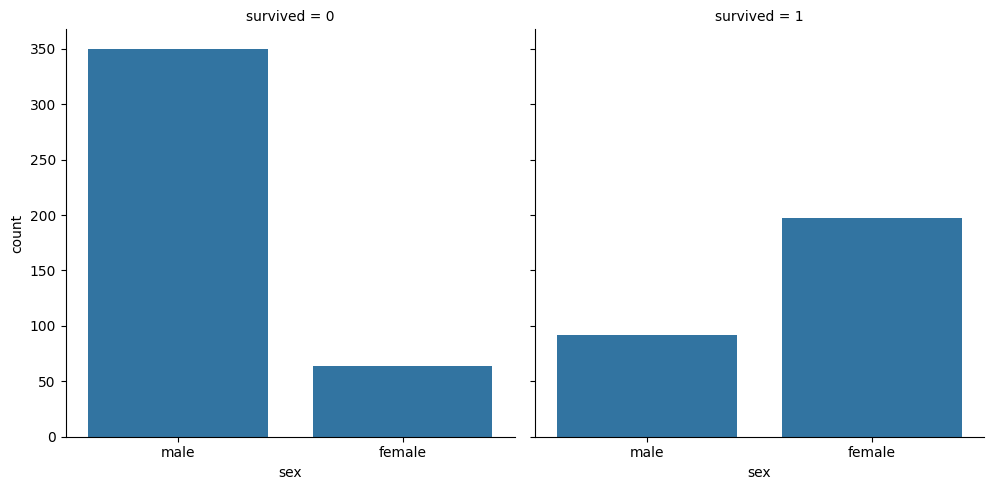

In [ ]:
sns.catplot(x='sex',col='survived',kind='count',data=df);


<Axes: xlabel='pclass', ylabel='survived'>

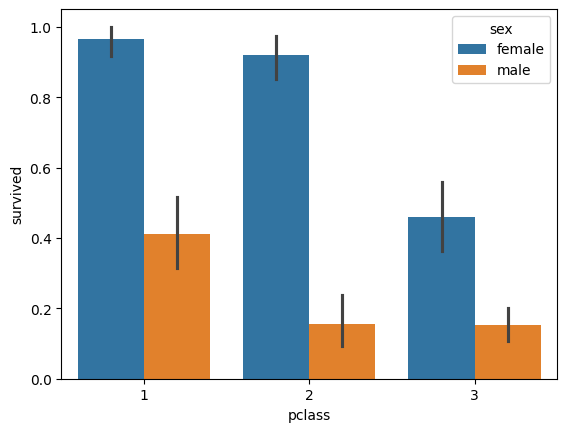

In [ ]:
sns.barplot(x='pclass',y='survived',hue='sex',data=df)